In [70]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import pandas as pd

file_path = '/content/drive/MyDrive/EWD/Dataset/riceClassification.csv'
df = pd.read_csv(file_path)
df.head()


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [72]:
# Show the number of rows and columns
df.shape

(18185, 12)

In [73]:
# Show column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [74]:
# Show summary statistics for numerical columns
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [75]:
# Check for missing values in each column
df.isnull().sum()

,0
id,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Perimeter,0
Roundness,0


# 1) EDA (Step 3): class distribution + feature histograms + correlation matrix

Class
0    8200
1    9985
Name: count, dtype: int64


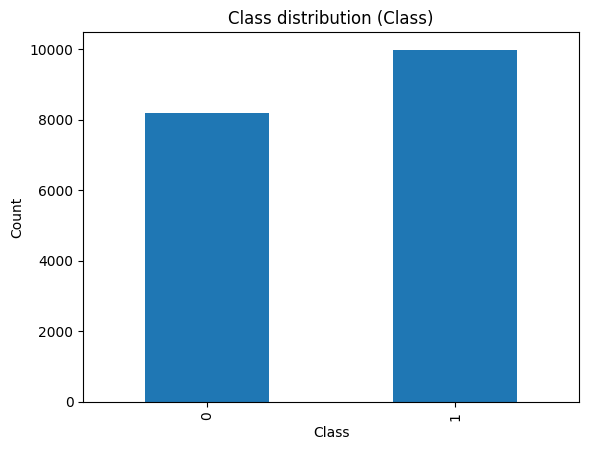

In [76]:
import matplotlib.pyplot as plt

class_counts = df["Class"].value_counts().sort_index()
print(class_counts)

plt.figure()
class_counts.plot(kind="bar")
plt.title("Class distribution (Class)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


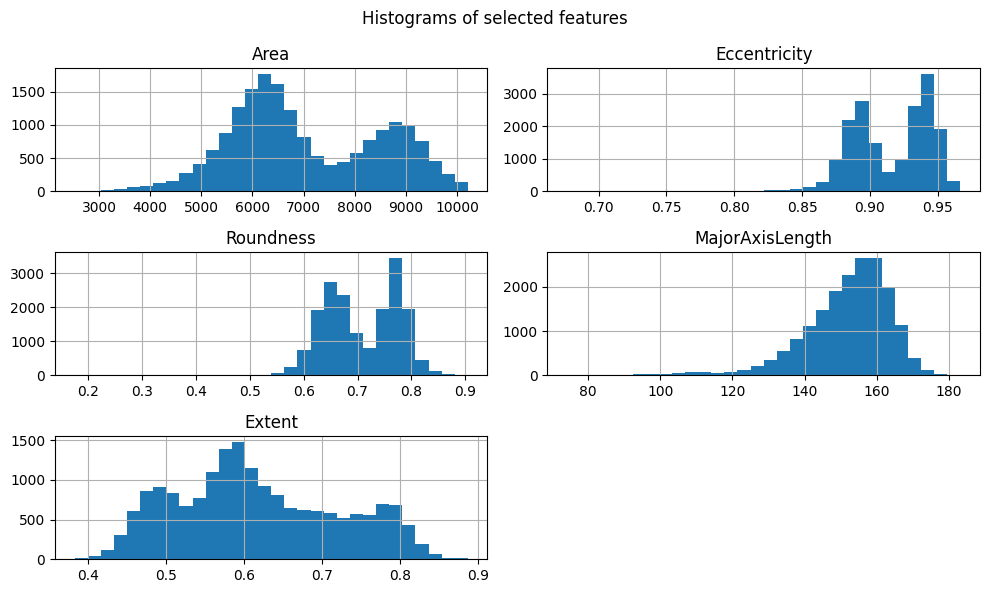

In [77]:
features = ["Area", "Eccentricity", "Roundness", "MajorAxisLength", "Extent"]
df[features].hist(bins=30, figsize=(10, 6))
plt.suptitle("Histograms of selected features")
plt.tight_layout()
plt.show()


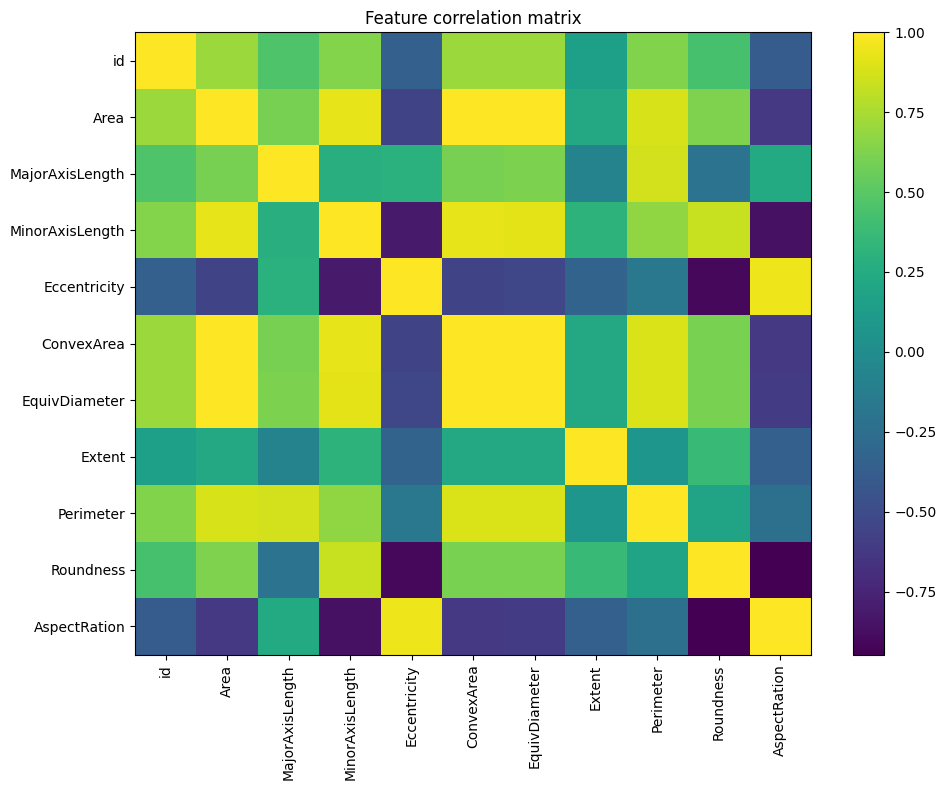

Top 10 correlations (|r|):
Area             ConvexArea         0.999362
                 EquivDiameter      0.998158
ConvexArea       EquivDiameter      0.997403
Eccentricity     AspectRation       0.950301
Roundness        AspectRation       0.947875
Area             MinorAxisLength    0.930215
MinorAxisLength  ConvexArea         0.928992
                 EquivDiameter      0.923790
Eccentricity     Roundness          0.903657
EquivDiameter    Perimeter          0.891567
dtype: float64


In [78]:
# Correlation matrix (heatmap-style, no seaborn)
import numpy as np

corr = df.drop(columns=["Class"]).corr(numeric_only=True)

plt.figure(figsize=(10, 8))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.title("Feature correlation matrix")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

# Optional: print top correlated feature pairs
corr_abs = corr.abs()
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
top_pairs = upper.stack().sort_values(ascending=False).head(10)
print("Top 10 correlations (|r|):")
print(top_pairs)


In [79]:
import numpy as np

# Correlation matrix (without target)
corr_matrix = df.drop(columns=["Class", "id"]).corr().abs()

# Upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find columns with correlation higher than threshold
threshold = 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print("Highly correlated features to drop:")
print(to_drop)


Highly correlated features to drop:
['ConvexArea', 'EquivDiameter', 'AspectRation']


In [80]:
# Drop highly correlated features
features_to_drop = [
    'ConvexArea',
    'EquivDiameter',
    'AspectRation',
    'Perimeter',
    'MinorAxisLength'
]

df_reduced = df.drop(columns=features_to_drop)

print("Original shape:", df.shape)
print("Reduced shape:", df_reduced.shape)
print("Remaining columns:", df_reduced.columns.tolist())


Original shape: (18185, 12)
Reduced shape: (18185, 7)
Remaining columns: ['id', 'Area', 'MajorAxisLength', 'Eccentricity', 'Extent', 'Roundness', 'Class']


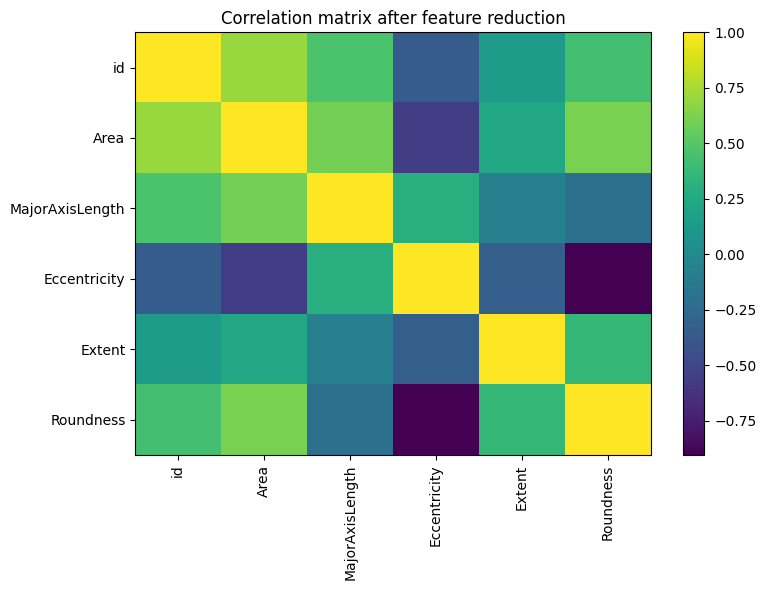

In [81]:
corr2 = df_reduced.drop(columns=["Class"]).corr(numeric_only=True)

plt.figure(figsize=(8, 6))
plt.imshow(corr2, aspect="auto")
plt.colorbar()
plt.title("Correlation matrix after feature reduction")
plt.xticks(range(len(corr2.columns)), corr2.columns, rotation=90)
plt.yticks(range(len(corr2.columns)), corr2.columns)
plt.tight_layout()
plt.show()


# 2) Data preparation (Step 4)

In [82]:
# Preprocessing (Step 4): drop id, split train/val/test, scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop non-informative column
df_model = df_reduced.drop(columns=["id"])

X = df_model.drop(columns=["Class"])
y = df_model["Class"]

# Split into train+val and test (15% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.15,
    random_state=42,
    stratify=y
)

# Split train+val into training and validation
# validation ≈ 15% of whole dataset => 0.15 / 0.85 ≈ 0.176
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.176,
    random_state=42,
    stratify=y_temp
)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

# Feature scaling (important for distance-based methods)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)


Train size: (12736, 5)
Validation size: (2721, 5)
Test size: (2728, 5)


# 3) Modeling (Step 5): kNN + Naive Bayes

In [83]:
# kNN: tune k using validation set (simple model selection)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

k_values = [1, 3, 5, 7, 9, 11, 15]
val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_s, y_train)
    y_val_pred = knn.predict(X_val_s)
    acc = accuracy_score(y_val, y_val_pred)
    val_scores.append(acc)

best_k = k_values[int(np.argmax(val_scores))]

print("kNN validation results:")
for k, acc in zip(k_values, val_scores):
    print(f"k = {k}, accuracy = {acc:.4f}")

print("Best k:", best_k)


kNN validation results:
k = 1, accuracy = 0.9809
k = 3, accuracy = 0.9868
k = 5, accuracy = 0.9882
k = 7, accuracy = 0.9871
k = 9, accuracy = 0.9875
k = 11, accuracy = 0.9871
k = 15, accuracy = 0.9879
Best k: 5


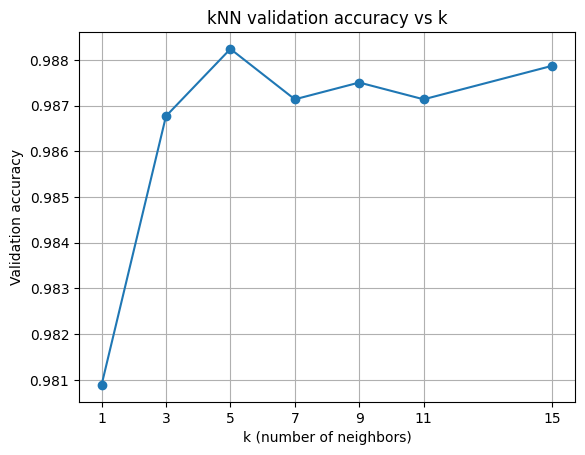

In [84]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values, val_scores, marker="o")
plt.title("kNN validation accuracy vs k")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Validation accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [85]:
# Naive Bayes (GaussianNB): validation score
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_s, y_train)

y_val_pred_nb = nb.predict(X_val_s)
acc_nb = accuracy_score(y_val, y_val_pred_nb)

print("Naive Bayes validation accuracy:", acc_nb)


Naive Bayes validation accuracy: 0.9779492833517089


# 4) Evaluation and model selection (Step 6)

In [86]:
# Validation reports
from sklearn.metrics import classification_report, confusion_matrix

# kNN with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_s, y_train)
y_val_pred_knn = knn_best.predict(X_val_s)

print("=== VALIDATION: kNN ===")
print("Accuracy:", accuracy_score(y_val, y_val_pred_knn))
print("Confusion matrix:\n", confusion_matrix(y_val, y_val_pred_knn))
print(classification_report(y_val, y_val_pred_knn))

print("\n=== VALIDATION: Naive Bayes ===")
print("Accuracy:", accuracy_score(y_val, y_val_pred_nb))
print("Confusion matrix:\n", confusion_matrix(y_val, y_val_pred_nb))
print(classification_report(y_val, y_val_pred_nb))


=== VALIDATION: kNN ===
Accuracy: 0.9882396177875781
Confusion matrix:
 [[1212   15]
 [  17 1477]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1227
           1       0.99      0.99      0.99      1494

    accuracy                           0.99      2721
   macro avg       0.99      0.99      0.99      2721
weighted avg       0.99      0.99      0.99      2721


=== VALIDATION: Naive Bayes ===
Accuracy: 0.9779492833517089
Confusion matrix:
 [[1200   27]
 [  33 1461]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1227
           1       0.98      0.98      0.98      1494

    accuracy                           0.98      2721
   macro avg       0.98      0.98      0.98      2721
weighted avg       0.98      0.98      0.98      2721



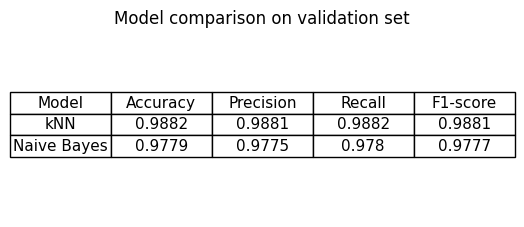

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

report_knn = classification_report(y_val, y_val_pred_knn, output_dict=True)
report_nb  = classification_report(y_val, y_val_pred_nb,  output_dict=True)

results_df = pd.DataFrame({
    "Model": ["kNN", "Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_val, y_val_pred_knn),
        accuracy_score(y_val, y_val_pred_nb)
    ],
    "Precision": [
        report_knn["macro avg"]["precision"],
        report_nb["macro avg"]["precision"]
    ],
    "Recall": [
        report_knn["macro avg"]["recall"],
        report_nb["macro avg"]["recall"]
    ],
    "F1-score": [
        report_knn["macro avg"]["f1-score"],
        report_nb["macro avg"]["f1-score"]
    ]
})

fig, ax = plt.subplots(figsize=(6.2, 2.4))
ax.axis("off")

table = ax.table(
    cellText=results_df.round(4).values,
    colLabels=results_df.columns,
    loc="center",
    cellLoc="center"
)

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.05, 1.3)

plt.title("Model comparison on validation set")
plt.show()


In [88]:
# Select best model and evaluate on TEST set
knn_val_acc = accuracy_score(y_val, y_val_pred_knn)
nb_val_acc  = accuracy_score(y_val, y_val_pred_nb)

best_model_name = "kNN" if knn_val_acc >= nb_val_acc else "Naive Bayes"
print("Selected model:", best_model_name)

best_model = knn_best if best_model_name == "kNN" else nb

# Final evaluation on test set
y_test_pred = best_model.predict(X_test_s)

print("\n=== TEST: selected model ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Selected model: kNN

=== TEST: selected model ===
Accuracy: 0.9912023460410557
Confusion matrix:
 [[1213   17]
 [   7 1491]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1230
           1       0.99      1.00      0.99      1498

    accuracy                           0.99      2728
   macro avg       0.99      0.99      0.99      2728
weighted avg       0.99      0.99      0.99      2728



In [89]:
from sklearn.metrics import accuracy_score

# Train accuracy
y_train_pred = best_model.predict(X_train_s)
train_acc = accuracy_score(y_train, y_train_pred)

# Validation accuracy
val_acc = accuracy_score(y_val, best_model.predict(X_val_s))

# Test accuracy
test_acc = accuracy_score(y_test, y_test_pred)

print("\n=== Overfitting check ===")
print("Train accuracy:", train_acc)
print("Validation accuracy:", val_acc)
print("Test accuracy:", test_acc)



=== Overfitting check ===
Train accuracy: 0.9901853015075377
Validation accuracy: 0.9882396177875781
Test accuracy: 0.9912023460410557


In [90]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()

print("\n=== Error analysis ===")
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

fp_rate = fp / (fp + tn)
fn_rate = fn / (fn + tp)

print("False Positive Rate:", fp_rate)
print("False Negative Rate:", fn_rate)



=== Error analysis ===
TN: 1213
FP: 17
FN: 7
TP: 1491
False Positive Rate: 0.013821138211382113
False Negative Rate: 0.004672897196261682


In [91]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=best_k)

cv_scores = cross_val_score(knn_cv, X_train_s, y_train, cv=5, scoring="accuracy")

print("\n=== Cross-validation (5-fold) ===")
print("CV accuracies:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("Std CV accuracy:", cv_scores.std())



=== Cross-validation (5-fold) ===
CV accuracies: [0.99215071 0.98665096 0.98665096 0.99057715 0.98468787]
Mean CV accuracy: 0.9881435295872448
Std CV accuracy: 0.0027704543153080886


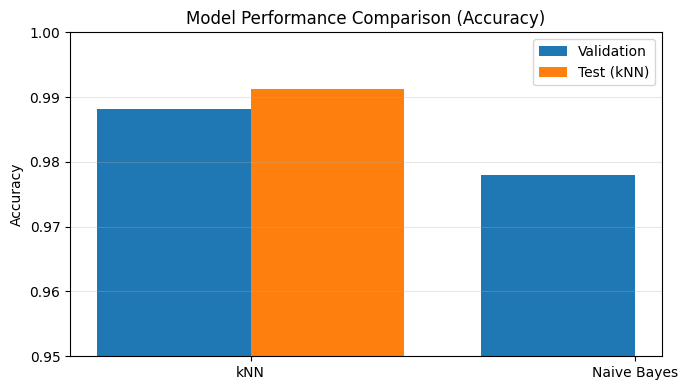

<Figure size 450x400 with 0 Axes>

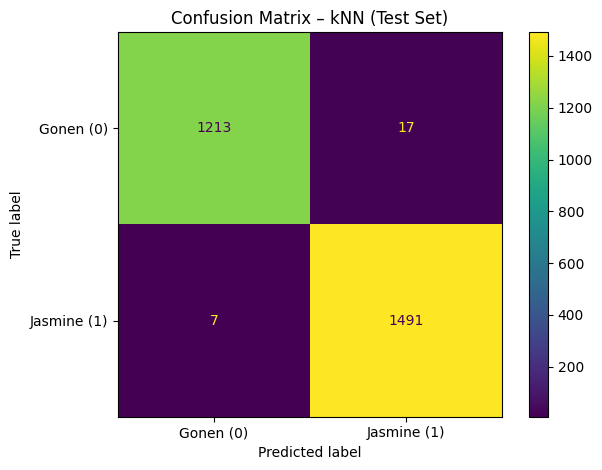

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Model accuracy comparison

# Validation accuracy
acc_knn_val = accuracy_score(y_val, y_val_pred_knn)
acc_nb_val  = accuracy_score(y_val, y_val_pred_nb)

# Test accuracy (selected model = kNN in your project)
acc_knn_test = accuracy_score(y_test, y_test_pred)

models = ["kNN", "Naive Bayes"]
val_scores = [acc_knn_val, acc_nb_val]

x = np.arange(len(models))

plt.figure(figsize=(7, 4))

# Validation bars
plt.bar(x - 0.2, val_scores, width=0.4, label="Validation")

# Test bar only for kNN (first model)
plt.bar(x[0] + 0.2, acc_knn_test, width=0.4, label="Test (kNN)")

plt.xticks(x, models)
plt.ylim(0.95, 1.0)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison (Accuracy)")
plt.legend()
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


# Confusion matrix for the best model (TEST set)

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Gonen (0)", "Jasmine (1)"]
)

plt.figure(figsize=(4.5, 4))
disp.plot(values_format="d")
plt.title("Confusion Matrix – kNN (Test Set)")
plt.tight_layout()
plt.show()
